### <b> Importing the required libraries and packages

In [196]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

#### Reading the csv file 

In [197]:
data = pd.read_csv("/Users/vamshikrishna/Downloads/Accusaga/DS_dataset.csv") 

In [198]:
data

,Customer_ID,Var1,Var2,Group,Category,Rating,Purchased_ABC_product
0,5518,41.534,12.123,G1,C1,Bronze,0
1,40515,9.445,0.256,G1,C1,Bronze,0
2,52697,37.599,3.199,G1,C2,Gold,0
3,68202,81.514,1.645,G1,C1,Silver,0
4,130003,46.805,1.706,G1,C1,Silver,0
...,...,...,...,...,...,...,...
30824,7047231,12.094,0.899,G5,C3,Bronze,1
30825,7079889,43.214,6.484,G5,C1,Bronze,1
30826,7155901,20.902,6.159,G5,C1,Bronze,1
30827,7180919,11.443,0.000,G5,C3,Bronze,0


In [199]:
# shape of the data
data.shape

(30829, 7)

# EDA

In [200]:
# Identifying unique values in each column for analyzation
print(len(data["Customer_ID"].unique()))
print(len(data["Var1"].unique()))
print(len(data["Var2"].unique()))

30829
26050
10982


In [201]:
print(len(data["Group"].unique()))
print(len(data["Category"].unique()))
print(len(data["Rating"].unique()))
print(len(data["Purchased_ABC_product"].unique()))

8
5
3
2


In [202]:
# The IS NULL command checks for empty values (NULL values).
data.isna().sum()

Customer_ID              0
Var1                     0
Var2                     0
Group                    0
Category                 0
Rating                   0
Purchased_ABC_product    0
dtype: int64

In [203]:
# details about a DataFrame, such as the index dtype and columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30829 entries, 0 to 30828
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            30829 non-null  int64  
 1   Var1                   30829 non-null  float64
 2   Var2                   30829 non-null  float64
 3   Group                  30829 non-null  object 
 4   Category               30829 non-null  object 
 5   Rating                 30829 non-null  object 
 6   Purchased_ABC_product  30829 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.6+ MB


###### Return a Series containing a count of the number of unique rows in the DataFrame.

In [204]:
print(data["Group"].value_counts())
print(data["Category"].value_counts())
print(data["Rating"].value_counts())
print(data["Purchased_ABC_product"].value_counts())

G1    19365
G5     8558
G3     1762
G4      494
G6      312
G2      298
G7       21
G8       19
Name: Group, dtype: int64
C1    14934
C3     6707
C2     4031
C5     2993
C4     2164
Name: Category, dtype: int64
Bronze    15127
Silver    10171
Gold       5531
Name: Rating, dtype: int64
1    15524
0    15305
Name: Purchased_ABC_product, dtype: int64


#### <b> basic statistical information such as percentile, mean, standard deviation, and so on

In [205]:
data.describe()

,Customer_ID,Var1,Var2,Purchased_ABC_product
count,3.082900e+04,30829.000000,30829.000000,30829.000000
mean,3.057482e+06,64.868318,4.994489,0.503552
std,2.210470e+06,114.373345,9.533546,0.499995
min,6.470000e+02,0.251000,0.000000,0.000000
25%,1.501804e+06,13.256000,0.668000,0.000000
50%,2.192582e+06,31.860000,2.189000,1.000000
75%,4.732076e+06,68.702000,5.482000,1.000000
max,7.285914e+06,2909.776000,317.380000,1.000000


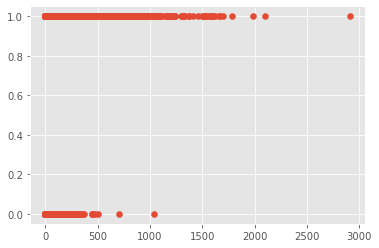

In [206]:
plt.scatter(data["Var1"], data["Purchased_ABC_product"])
plt.show()

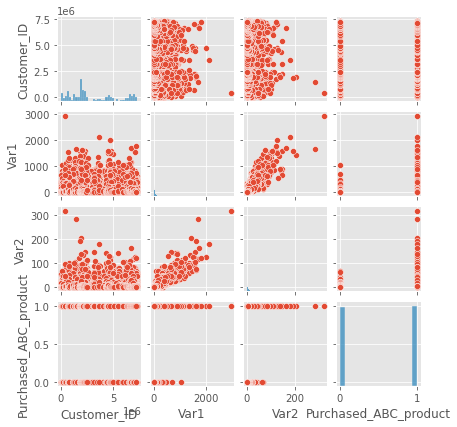

In [207]:
sns.pairplot(data, height=1.5);
plt.show()

- We have a linear realtion between the Var1 and Var2 
* Most of the values lies between 65 and 120 in Var1, similarly 5 to 19 in Var2 

#### Lets Find the corelation between the Var1 and Var1

In [208]:
data.corr()

,Customer_ID,Var1,Var2,Purchased_ABC_product
Customer_ID,1.000000,0.002707,0.049997,0.037436
Var1,0.002707,1.000000,0.878002,0.316515
Var2,0.049997,0.878002,1.000000,0.350131
Purchased_ABC_product,0.037436,0.316515,0.350131,1.000000


- Var1 and Var2 have 0.87 correlation so we muct include them in our prediction

# Categorical data into numerical
##### Till now we have worked on the numerical data mentioned in the data set 
##### Now We are converting the categorical data into numerical data 

DUmmies

In [209]:
data = pd.get_dummies(data=data, columns=["Group",	"Category",	"Rating"])

In [210]:
data

,Customer_ID,Var1,Var2,Purchased_ABC_product,Group_G1,Group_G2,Group_G3,Group_G4,Group_G5,Group_G6,Group_G7,Group_G8,Category_C1,Category_C2,Category_C3,Category_C4,Category_C5,Rating_Bronze,Rating_Gold,Rating_Silver
0,5518,41.534,12.123,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,40515,9.445,0.256,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,52697,37.599,3.199,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,68202,81.514,1.645,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,130003,46.805,1.706,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30824,7047231,12.094,0.899,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
30825,7079889,43.214,6.484,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
30826,7155901,20.902,6.159,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
30827,7180919,11.443,0.000,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


- Var1 and Var2 data has varying scales
+ Dividing the each value in the Var1 and Var2 by is's maximum value since It helps in removing bias from the feature.

#### Rescaling the values into the range [0,1]

In [211]:
data["Var1"] = data["Var1"]/data["Var1"].max()
data["Var2"] = data["Var2"]/data["Var2"].max()

* Removing the column "Customer_ID" it is not helps us in predition 


In [212]:
data = data.drop("Customer_ID", axis = 1)

##### Separation the target and features 

In [213]:
X = data.drop("Purchased_ABC_product", axis = 1)
y = data["Purchased_ABC_product"]

In [214]:
# Features
X

,Var1,Var2,Group_G1,Group_G2,Group_G3,Group_G4,Group_G5,Group_G6,Group_G7,Group_G8,Category_C1,Category_C2,Category_C3,Category_C4,Category_C5,Rating_Bronze,Rating_Gold,Rating_Silver
0,0.014274,0.038197,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0.003246,0.000807,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,0.012922,0.010079,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0.028014,0.005183,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0.016085,0.005375,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30824,0.004156,0.002833,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
30825,0.014851,0.020430,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
30826,0.007183,0.019406,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
30827,0.003933,0.000000,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [221]:
#target
y

0        0
1        0
2        0
3        0
4        0
        ..
30824    1
30825    1
30826    1
30827    0
30828    0
Name: Purchased_ABC_product, Length: 30829, dtype: int64

### Splitting the data inti train and test  

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [223]:
X_train

,Var1,Var2,Group_G1,Group_G2,Group_G3,Group_G4,Group_G5,Group_G6,Group_G7,Group_G8,Category_C1,Category_C2,Category_C3,Category_C4,Category_C5,Rating_Bronze,Rating_Gold,Rating_Silver
14919,0.003427,0.000000,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
9938,0.038816,0.064642,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
22763,0.016501,0.003450,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
18327,0.003398,0.016614,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
28332,0.010194,0.004918,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,0.006432,0.007281,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
5390,0.015082,0.000473,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
860,0.024995,0.010319,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
15795,0.006035,0.000649,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [224]:
y_train

14919    0
9938     1
22763    1
18327    1
28332    0
        ..
29802    1
5390     0
860      1
15795    0
23654    0
Name: Purchased_ABC_product, Length: 20655, dtype: int64

I have been selecting the random forest model because 
- it is Low Bias
- High variance
- compare to the all models poly, linear, Dtree, ....etc it has given the high accuracy 

In [225]:
model = RandomForestClassifier(random_state=42, n_estimators=100, bootstrap=True,
 class_weight= "balanced_subsample", criterion= "gini", max_depth=None, min_samples_leaf= 6, min_samples_split=2)

- After performing the GridsearchCv I defined the model with varius parameters 

##### training the model 

In [228]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', min_samples_leaf=6,
                       random_state=42)

#### Visuvalizing the model

In [231]:
estimator = model.estimators_
estimator

[DecisionTreeClassifier(max_features='auto', min_samples_leaf=6,
                        random_state=1608637542),
 DecisionTreeClassifier(max_features='auto', min_samples_leaf=6,
                        random_state=1273642419),
 DecisionTreeClassifier(max_features='auto', min_samples_leaf=6,
                        random_state=1935803228),
 DecisionTreeClassifier(max_features='auto', min_samples_leaf=6,
                        random_state=787846414),
 DecisionTreeClassifier(max_features='auto', min_samples_leaf=6,
                        random_state=996406378),
 DecisionTreeClassifier(max_features='auto', min_samples_leaf=6,
                        random_state=1201263687),
 DecisionTreeClassifier(max_features='auto', min_samples_leaf=6,
                        random_state=423734972),
 DecisionTreeClassifier(max_features='auto', min_samples_leaf=6,
                        random_state=415968276),
 DecisionTreeClassifier(max_features='auto', min_samples_leaf=6,
                   

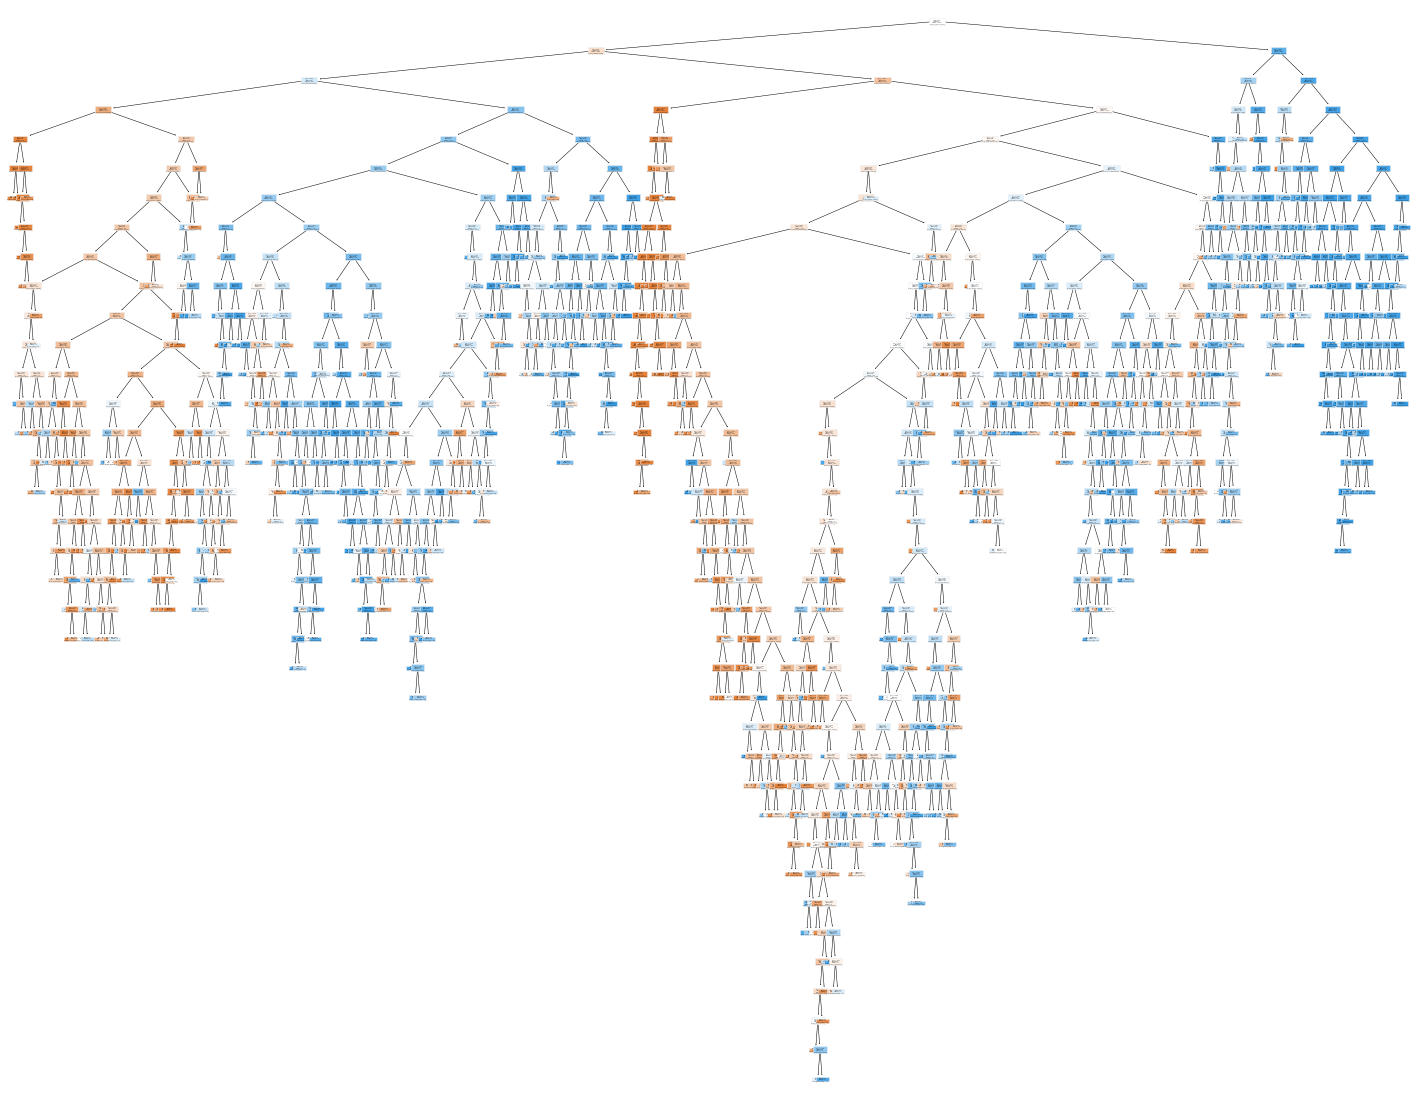

In [234]:
from sklearn import tree 
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model.estimators_[2],  filled=True)

## Accuracy Tests

In [238]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))          

In [239]:
print_score(model, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.8335

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.80      0.83     10268
           1       0.82      0.86      0.84     10387

    accuracy                           0.83     20655
   macro avg       0.83      0.83      0.83     20655
weighted avg       0.83      0.83      0.83     20655


Confusion Matrix: 
 [[8258 2010]
 [1429 8958]]

Average Accuracy: 	 0.7552
Accuracy SD: 		 0.0090


In [240]:
print_score(model, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7623

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.73      0.75      5037
           1       0.75      0.79      0.77      5137

    accuracy                           0.76     10174
   macro avg       0.76      0.76      0.76     10174
weighted avg       0.76      0.76      0.76     10174


Confusion Matrix: 
 [[3690 1347]
 [1071 4066]]

